# Summarize name matching

In [ ]:
Questions 

1 Do we want to ignore whitespace
    -What is the importance of whitespace in authority?
    -This is important when it comes to authority, there is a great amoung of names in BB that 
        will match only when white space is ignored. 

2 Do we want to match only when the synonym is the same 

In [8]:
from collections import Counter
import re
import glob
import numpy as np
import pandas as pd
import csv

merged = pd.read_csv('/home/lujantorob/global_brassicaceae_checklist_v2/data/interim/matched_data.csv').fillna("")
clean_all_df = pd.DataFrame (columns=["Name","Synonym_of","IPNI","BrassiBase"])

for row, name in enumerate(merged.Name_F):
# UNCOMMENT THE FOLLOWING IF IGNORING WHITESPACE AND CAPITALIZATION
#     synonym_of = merged["Synonym_of"][row].replace(" ", "").lower()
#     our_name = name.replace(" ", "").lower()
#     bb_name = merged.Name_BB[row].replace(" ", "").lower()
#     ipni_name = merged.Name_IPNI[row].replace(" ", "").lower()
#     bb_synonym = merged.BB_synonym_of[row].replace(" ", "").lower()
# COMMENT OUT THE FOLLOWING IF NOT IGNORIGING WHITESPACE AND CAPS
    synonym_of = merged["Synonym_of"][row]
    our_name = name
    bb_name = merged.Name_BB[row]
    ipni_name = merged.Name_IPNI[row]
    bb_synonym = merged.BB_synonym_of[row]
    
    
    if name is "":
        continue
    if our_name == bb_name and our_name == ipni_name: #UNCOMMENT IF SYN. IRRELEVANT
#     if our_name == bb_name and our_name == ipni_name and synonym_of == bb_synonym:  #UNCOMMENT IF SYN. RELEVANT
        clean_all_df = clean_all_df.append ({"Name":name,
                               "Synonym_of": synonym_of,
                               "IPNI": True,
                               "BrassiBase": True}, ignore_index=True)
    elif our_name == bb_name: #UNCOMMENT IF SYN. IRRELEVANT
#     elif our_name == bb_name and synonym_of == bb_synonym:  #UNCOMMENT IF SYN. RELEVANT
        clean_all_df = clean_all_df.append ({"Name":name,
                       "Synonym_of":synonym_of,
                       "IPNI": False,
                       "BrassiBase": True}, ignore_index=True)
    elif our_name == ipni_name:
        clean_all_df = clean_all_df.append ({"Name":name,
                       "Synonym_of":synonym_of,
                       "IPNI": True,
                       "BrassiBase": False}, ignore_index=True)
    else:
        clean_all_df = clean_all_df.append ({"Name":name,
               "Synonym_of":synonym_of,
               "IPNI": False,
               "BrassiBase": False}, ignore_index=True)

#clean_all_df.to_csv('/home/lujantorob/global_brassicaceae_checklist_v2/data/interim/merged_data_simple.csv', index=False, encoding='utf-8')

## Proportion Checklist names matched to IPNI and BrassiBase 

6485=43.2823867049
3083=20.5766535407
2762=18.4342254555
2653=17.7067342989


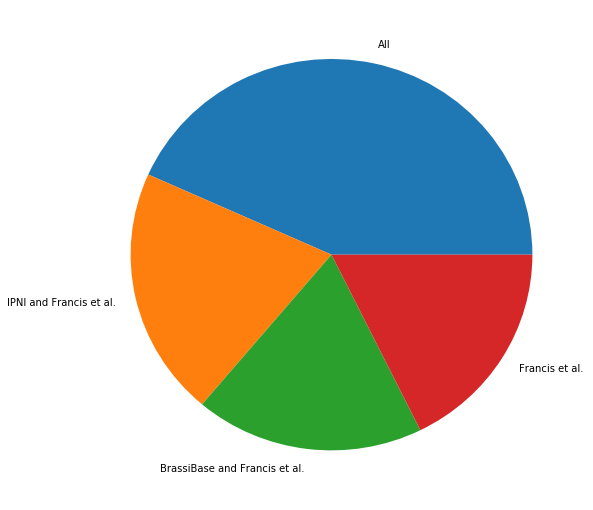

In [6]:
import matplotlib as plt
from __future__ import division

#NEW
clean_all_df = pd.read_csv('/home/lujantorob/global_brassicaceae_checklist_v2/data/interim/merged_data_simple.csv').fillna("")

#accepted = clean_all_df[clean_all_df['Synonym_of'] == ""]
#synonym = clean_all_df[clean_all_df['Synonym_of']!= ""]

all_count = len(clean_all_df[(clean_all_df['IPNI']== True) & (clean_all_df['BrassiBase']== True)])
francis_ipni = len(clean_all_df[(clean_all_df['IPNI']== True) & (clean_all_df['BrassiBase']== False)])
francis_bb = len(clean_all_df[(clean_all_df['IPNI']== False) & (clean_all_df['BrassiBase']== True)]  )
francis = len(clean_all_df[(clean_all_df['IPNI']== False) & (clean_all_df['BrassiBase']== False)]  )
chart = [all_count, francis_ipni, francis_bb, francis]

total = all_count + francis_bb + francis_ipni + francis
print(str(all_count) + "=" + str(((all_count/total)*100)))
print(str(francis_ipni) + "=" + str(((francis_ipni/total)*100)))
print(str(francis_bb) + "=" + str(((francis_bb/total)*100)))
print(str(francis) + "=" + str(((francis/total)*100)))
df = pd.DataFrame(chart, index=['All', 'IPNI and Francis et al.', 'BrassiBase and Francis et al.', 'Francis et al.'], columns=[''])

# make the plot
my_plot = df.plot(kind='pie', subplots=True, figsize=(9,9), legend=None)[0].get_figure()
my_plot.savefig('/home/lujantorob/global_brassicaceae_checklist_v2/data/interim/Francis_IPNI_BB_pie_chart.png')

## Proportion Checklist names matched to IPNI and BrassiBase whitespace ignored

9076=60.5753186945
532=3.55069078289
3984=26.5901354869
1391=9.28385503571


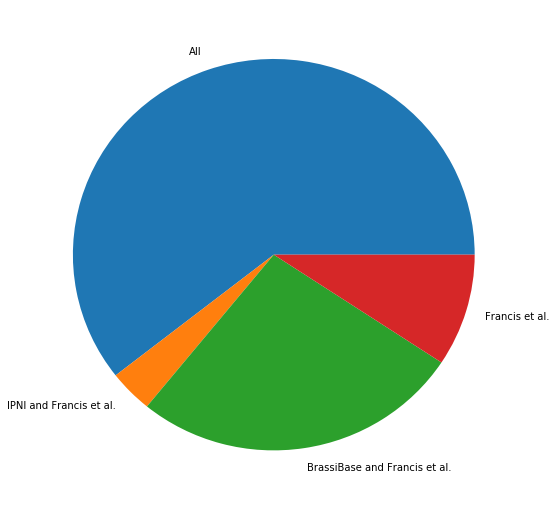

In [4]:
from collections import Counter
import re
import glob
import numpy as np
import pandas as pd
import csv
from __future__ import division


merged = pd.read_csv('/home/lujantorob/global_brassicaceae_checklist_v2/data/interim/matched_data.csv').fillna("")
clean_all_df = pd.DataFrame (columns=["Name","Synonym_of","IPNI","BrassiBase"])

for row, name in enumerate(merged.Name_F):
# UNCOMMENT THE FOLLOWING IF IGNORING WHITESPACE AND CAPITALIZATION
    synonym_of = merged["Synonym_of"][row].replace(" ", "").lower()
    our_name = name.replace(" ", "").lower()
    bb_name = merged.Name_BB[row].replace(" ", "").lower()
    ipni_name = merged.Name_IPNI[row].replace(" ", "").lower()
    bb_synonym = merged.BB_synonym_of[row].replace(" ", "").lower()
# COMMENT OUT THE FOLLOWING IF NOT IGNORIGING WHITESPACE AND CAPS
#     synonym_of = merged["Synonym_of"][row]
#     our_name = name
#     bb_name = merged.Name_BB[row]
#     ipni_name = merged.Name_IPNI[row]
#     bb_synonym = merged.BB_synonym_of[row]
    
    
    if name is "":
        continue
    if our_name == bb_name and our_name == ipni_name: #UNCOMMENT IF SYN. IRRELEVANT
#     if our_name == bb_name and our_name == ipni_name and synonym_of == bb_synonym: #UNCOMMENT IF SYN. RELEVANT
        clean_all_df = clean_all_df.append ({"Name":name,
                               "Synonym_of": synonym_of,
                               "IPNI": True,
                               "BrassiBase": True}, ignore_index=True)
    elif our_name == bb_name: #UNCOMMENT IF SYN. IRRELEVANT
#     elif our_name == bb_name and synonym_of == bb_synonym: #UNCOMMENT IF SYN. RELEVANT
        clean_all_df = clean_all_df.append ({"Name":name,
                       "Synonym_of":synonym_of,
                       "IPNI": False,
                       "BrassiBase": True}, ignore_index=True)
    elif our_name == ipni_name:
        clean_all_df = clean_all_df.append ({"Name":name,
                       "Synonym_of":synonym_of,
                       "IPNI": True,
                       "BrassiBase": False}, ignore_index=True)
    else:
        clean_all_df = clean_all_df.append ({"Name":name,
               "Synonym_of":synonym_of,
               "IPNI": False,
               "BrassiBase": False}, ignore_index=True)

all_count = len(clean_all_df[(clean_all_df['IPNI']== True) & (clean_all_df['BrassiBase']== True)])
francis_ipni = len(clean_all_df[(clean_all_df['IPNI']== True) & (clean_all_df['BrassiBase']== False)])
francis_bb = len(clean_all_df[(clean_all_df['IPNI']== False) & (clean_all_df['BrassiBase']== True)]  )
francis = len(clean_all_df[(clean_all_df['IPNI']== False) & (clean_all_df['BrassiBase']== False)]  )
chart = [all_count, francis_ipni, francis_bb, francis]

total = all_count + francis_bb + francis_ipni + francis
print(str(all_count) + "=" + str(((all_count/total)*100)))
print(str(francis_ipni) + "=" + str(((francis_ipni/total)*100)))
print(str(francis_bb) + "=" + str(((francis_bb/total)*100)))
print(str(francis) + "=" + str(((francis/total)*100)))
df = pd.DataFrame(chart, index=['All', 'IPNI and Francis et al.', 'BrassiBase and Francis et al.', 'Francis et al.'], columns=[''])

# make the plot
my_plot = df.plot(kind='pie', subplots=True, figsize=(9,9), legend=None)[0].get_figure()
my_plot.savefig('/home/lujantorob/global_brassicaceae_checklist_v2/data/interim/Francis_IPNI_BB_pie_chart_nowhitespace.png')

## Francis et al. vs BrassiBase

8188


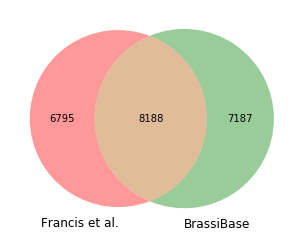

None


NameError: name 'matplotlib' is not defined

In [58]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from collections import Counter
import re
import glob
import numpy as np
import pandas as pd
import csv

merged = pd.read_csv('/home/lujantorob/global_brassicaceae_checklist_v2/data/interim/matched_data.csv').fillna("")
clean_all_df = pd.DataFrame (columns=["Name","Synonym_of","IPNI","BrassiBase"])

for row, name in enumerate(merged.Name_F):
# UNCOMMENT THE FOLLOWING IF IGNORING WHITESPACE AND CAPITALIZATION
#     synonym_of = merged["Synonym_of"][row].replace(" ", "").lower()
#     our_name = name.replace(" ", "").lower()
#     bb_name = merged.Name_BB[row].replace(" ", "").lower()
#     ipni_name = merged.Name_IPNI[row].replace(" ", "").lower()
#     bb_synonym = merged.BB_synonym_of[row].replace(" ", "").lower()
# COMMENT OUT THE FOLLOWING IF NOT IGNORIGING WHITESPACE AND CAPS
    synonym_of = merged["Synonym_of"][row]
    our_name = name
    bb_name = merged.Name_BB[row]
    ipni_name = merged.Name_IPNI[row]
    bb_synonym = merged.BB_synonym_of[row]
    
    
    if name is "":
        continue
#     if our_name == bb_name and our_name == ipni_name: #UNCOMMENT IF SYN. IRRELEVANT
    if our_name == bb_name and our_name == ipni_name and synonym_of == bb_synonym:  #UNCOMMENT IF SYN. RELEVANT
        clean_all_df = clean_all_df.append ({"Name":name,
                               "Synonym_of": synonym_of,
                               "IPNI": True,
                               "BrassiBase": True}, ignore_index=True)
#     elif our_name == bb_name: #UNCOMMENT IF SYN. IRRELEVANT
    elif our_name == bb_name and synonym_of == bb_synonym:  #UNCOMMENT IF SYN. RELEVANT
        clean_all_df = clean_all_df.append ({"Name":name,
                       "Synonym_of":synonym_of,
                       "IPNI": False,
                       "BrassiBase": True}, ignore_index=True)
    elif our_name == ipni_name:
        clean_all_df = clean_all_df.append ({"Name":name,
                       "Synonym_of":synonym_of,
                       "IPNI": True,
                       "BrassiBase": False}, ignore_index=True)
    else:
        clean_all_df = clean_all_df.append ({"Name":name,
               "Synonym_of":synonym_of,
               "IPNI": False,
               "BrassiBase": False}, ignore_index=True)

#Open lists to get totals
path = "/home/lujantorob/global_brassicaceae_checklist_v2/data/interim"
our_list = pd.read_csv(path + '/species_checklist_v2.7.1_ipni_scored.csv').fillna("")
bb_list = pd.read_csv(path + '/brassicaceae_species_bb1-3_accepted_ipni_scored.csv').fillna("")
bb_syn_list = pd.read_csv(path + '/brassicaceae_species_bb1-3_synonym_ipni_scored.csv').fillna("")
bb_list = bb_list.append(bb_syn_list, ignore_index=True)

#Numbers for the plot
shared = len(clean_all_df[(clean_all_df['BrassiBase']== True)])
print(shared)
bb = len(bb_list) - shared
francis = len(our_list) - shared

venn2(subsets = (francis, bb, shared), set_labels = ('Francis et al.', 'BrassiBase'))
print(plt.show())
matplotlib.pyplot.savefig('test.png')

Bring in old data, mark updated names 

In [7]:
import pandas as pd
old_database = pd.read_csv('/home/lujantorob/global_brassicaceae_checklist_v2/data/interim/Species_Checklist_V0.1.csv').fillna("")
new_database = pd.read_csv('/home/lujantorob/global_brassicaceae_checklist_v2/data/interim/species_checklist_v2.7.1.csv').fillna("")
new_database["SCIENTIFIC_NAME"] = new_database.GENUS.str.strip() + " " + new_database.SPECIES.str.strip() + " " + new_database.SUBSP_VAR.str.strip() + new_database.BAUTH.str.strip() + " " + new_database.AUTH.str.strip()
new_database.SCIENTIFIC_NAME = new_database.SCIENTIFIC_NAME.str.replace('  ', ' ') 
new_database.SCIENTIFIC_NAME = new_database.SCIENTIFIC_NAME.str.strip()
old_database["SCIENTIFIC_NAME"] = old_database.GENUS.str.strip() + " " + old_database.SPECIES.str.strip() + " " + old_database.SUBSP_VAR.str.strip() + old_database.BAUTH.str.strip() + " " + old_database.AUTH.str.strip()
old_database.SCIENTIFIC_NAME = old_database.SCIENTIFIC_NAME.str.replace('  ', ' ') 
old_database.SCIENTIFIC_NAME = old_database.SCIENTIFIC_NAME.str.strip()
old_database["FULL_NAME"] = old_database.GENUS.str.strip() + " " + old_database.SPECIES.str.strip() + " " + old_database.SUBSP_VAR.str.strip()
old_database.FULL_NAME = old_database.FULL_NAME.str.replace('  ', ' ') 
old_database.FULL_NAME = old_database.FULL_NAME.str.strip()
old_names = old_database.FULL_NAME.tolist()
old_database["CONCAT"] = old_database.SPECIES.str.strip() + " " + old_database.SUBSP_VAR.str.strip() + " " + old_database.BAUTH.str.strip() + " " + old_database.AUTH.str.strip()
old_database.CONCAT = old_database.CONCAT.str.replace('  ', ' ')
old_database.CONCAT = old_database.CONCAT.str.replace('  ', ' ') 
old_database.CONCAT = old_database.CONCAT.str.strip()
old_concat = old_database.CONCAT.tolist()

new_name_count = 0
name_changed = 0
name_moved = 0
changed_authority = 0 
changed_authority_space = 0 
changed_status = 0


for row, name in enumerate(new_database.FULL_NAME):
    if name.strip() not in old_names:
        if new_database.SUBSP_VAR[row] is not "":
            name_concat = new_database.SPECIES[row] + " " + new_database.SUBSP_VAR[row] + " " + new_database.BAUTH[row][1:-1]
        else:
            name_concat = new_database.SPECIES[row] + " " + new_database.BAUTH[row][1:-1]
        if name_concat in old_concat:
            name_moved += 1
            index = old_concat.index(name_concat)
            old_name = old_database.SCIENTIFIC_NAME[index]
        else:
            new_name_count += 1
            
    else:
        new_name = new_database.SCIENTIFIC_NAME[row]
        index = old_names.index(name.strip())
        old_name = old_database.SCIENTIFIC_NAME[index]
        if new_name != old_name:
            if new_name.replace(" ", "") != old_name.replace(" ", ""):
                changed_authority += 1

            else:
                changed_authority_space += 1
                #print(old_name + " " + new_name)
                
        if new_database.SYNONYM_OF[row] != old_database.SYNONYM_OF[index]:
            changed_status += 1
            
print("New names: " + str(new_name_count))
print("Name changed genus: " + str(name_moved))
print("Name authority changed: " + str(changed_authority) + " and " + str(changed_authority_space) + " are whitespace changes ")
print("Change of status: " + str(changed_status))


New names: 1212
Name changed genus: 131
Name authority changed: 686 and 3632 are whitespace changes 
Change of status: 1970


## Total IPNI no match

In [51]:
from collections import Counter
import re
import glob
import numpy as np
import pandas as pd
import csv

merged = pd.read_csv('/home/lujantorob/global_brassicaceae_checklist_v2/data/interim/matched_data.csv').fillna("")
df_francis_ipni = pd.DataFrame (columns=["TaxonID","Name","Authority according to Francis et al.", "Authority according to IPNI"])
count_ipni_no_match = 0

def parseName(name):
    name_list = name.split(" ")
    rank = ""
    if " prol. " in name or " subsp. " in name or " var. " in name:
        name_clean = " ".join(name_list[0:4]) 
        if len(name_list) > 4:
            authority = " ".join(name_list[4:])
        else:
            authority = ""
        return name_clean, authority
    else:
        if len(name_list) == 0:
            rank = ""
            name_list_clean = []
        elif len(name_list) == 1:
            rank = "genus"
        else:
            if name_list[1][0].islower():
                rank = "species"
                name_clean = " ".join(name_list[0:2]) 
                if len(name_list) > 2:
                    authority = " ".join(name_list[2:])
                else:
                    authority = ""
                return name_clean, authority
            else:
                rank = "genus"
   
for row, name in enumerate(merged.Name_F):
    taxon_id = row + 1 
    synonym_of = merged["Synonym_of"][row]
    ipni_name = merged.Name_IPNI[row]
    if ipni_name == "":
        count_ipni_no_match += 1

print(count_ipni_no_match)


2520
